In [323]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define classe de processo

In [324]:
class Process:
  def __init__(self, pid, burst_time):
    self.pid = pid
    self.burst_time = burst_time
    self.remaining = burst_time


# Define função que faz o algoritmo de escalonamento

In [325]:
def round_robin(process, quantum):
  n = len(process)
  waiting_time = [0] * n
  return_time = [0] * n
  time = 0

  exec = []
  queue = list(range(n))
  burst_time = []

  for i in range(n):
    burst_time.append(process[i].burst_time)

  while queue:
    i = queue.pop(0)

    p = process[i]

    if p.remaining > 0:
        exec.append(p.pid)

        if p.remaining > quantum:
            time += quantum
            p.remaining -= quantum
            time += 1
            queue.append(i)

        else:
            time += p.remaining
            waiting_time[i] = time - p.burst_time
            p.remaining = 0
            time += 1

  for i in range(n):
    return_time[i] = process[i].burst_time + waiting_time[i]

  total_wt = 0
  total_rt = 0
  rate = len(process) / time

  for i in range(len(process)):
    total_wt +=  waiting_time[i]
    total_rt += return_time[i]

  avg_wt = total_wt /n
  avg_rt = total_rt / n

  return burst_time, avg_wt, avg_rt, total_wt, total_rt, rate, waiting_time, return_time, time, exec

# Função de plotar gráfico

In [326]:
cores = ['#04558A', '#6C117B', '#340763', '#F8C304']

In [327]:
def plot_grafico(time_list, quantum, type_time):
    plt.figure(figsize=(6,4))
    plt.xticks(fontsize=12)
    for i in range(4):
        plt.bar(i+1, time_list[i], color=cores[i], width=0.8)
    plt.xlabel('PID do processo', fontsize=12)
    plt.ylabel(f'Tempo de {type_time}', fontsize=12)
    plt.title(f'Tempo de {type_time} com Quantum {quantum}',fontsize=12)

    plt.show()

In [328]:
avg_wait_time = {}
avg_ret_time = {}
total_time = {}
rates = {}

# Resultados de Quantum = 1


In [329]:
process = [Process(1, 11), Process(2, 15), Process(3, 6), Process(4, 4)]
quantum = 1

In [330]:
burst_time, avg_wt, avg_rt, total_wt, total_rt, rate, waiting_time, return_time, time, exec = round_robin(process, quantum)

print("Burst Time", burst_time)
print("Tempo de espera", waiting_time)
print("Tempo de retorno", return_time)
print(f"\nTempo médio de espera = {avg_wt}")
print(f"Tempo médio de retorno = {avg_rt} ")
print(f"Tempo total de execução = {time}")
print("Vazão = %.5f processos por unidade de tempo" % rate)
print("Sequência de execução: ", exec)

Burst Time [11, 15, 6, 4]
Tempo de espera [50, 56, 37, 27]
Tempo de retorno [61, 71, 43, 31]

Tempo médio de espera = 42.5
Tempo médio de retorno = 51.5 
Tempo total de execução = 72
Vazão = 0.05556 processos por unidade de tempo
Sequência de execução:  [1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 1, 2, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2]


In [331]:
avg_wait_time[quantum] = avg_wt
avg_ret_time[quantum] = avg_rt
total_time[quantum] = time
rates[quantum] = rate

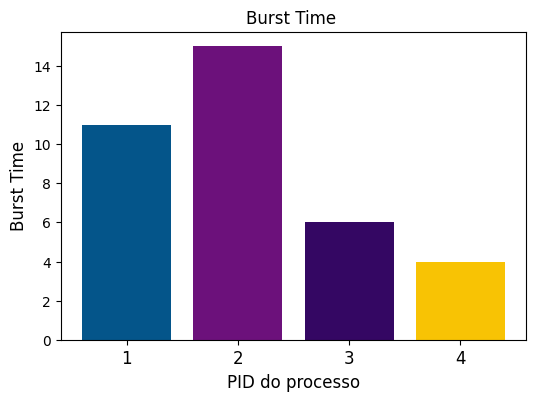

In [364]:
plt.figure(figsize=(6,4))
plt.xticks(fontsize=12)
processos = ['1', '2', '3', '4']
for i in range(4):
    plt.bar(processos[i], burst_time[i], color=cores[i], width=0.8)
plt.xlabel('PID do processo', fontsize=12)
plt.ylabel(f'Burst Time', fontsize=12)
plt.title(f'Burst Time ',fontsize=12)

plt.show()

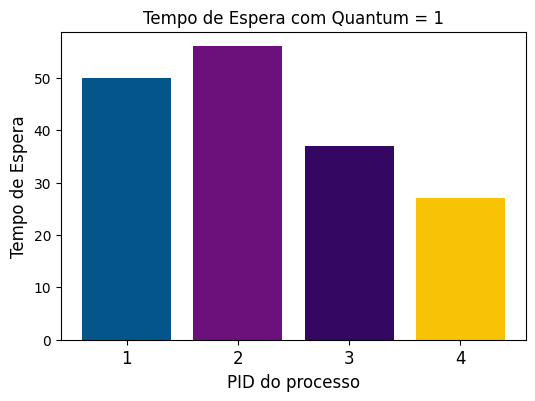

In [333]:
plt.figure(figsize=(6,4))
plt.xticks(fontsize=12)
processos = ['1', '2', '3', '4']
for i in range(4):
    plt.bar(processos[i], waiting_time[i], color=cores[i], width=0.8)
plt.xlabel('PID do processo', fontsize=12)
plt.ylabel(f'Tempo de Espera', fontsize=12)
plt.title(f'Tempo de Espera com Quantum = {quantum}',fontsize=12)

plt.show()

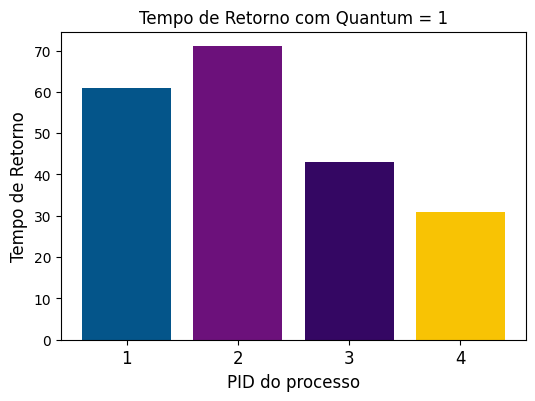

In [334]:
plt.figure(figsize=(6,4))
plt.xticks(fontsize=12)
processos = ['1', '2', '3', '4']
for i in range(4):
    plt.bar(processos[i], return_time[i], color=cores[i], width=0.8)
plt.xlabel('PID do processo', fontsize=12)
plt.ylabel(f'Tempo de Retorno', fontsize=12)
plt.title(f'Tempo de Retorno com Quantum = {quantum}',fontsize=12)

plt.show()

# Resultados de Quantum = 5

In [335]:
process = [Process(1, 11), Process(2, 15), Process(3, 6), Process(4, 4)]
quantum = 5

In [336]:
burst_time, avg_wt, avg_rt, total_wt, total_rt, rate, waiting_time, return_time, time, exec = round_robin(process, quantum)

print("Burst Time", burst_time)
print("Tempo de espera", waiting_time)
print("Tempo de retorno", return_time)
print(f"\nTempo médio de espera = {avg_wt}")
print(f"Tempo médio de retorno = {avg_rt} ")
print(f"Tempo total de execução = {time}")
print("Vazão = %.5f processos por unidade de tempo" % rate)
print("Sequência de execução: ", exec)

Burst Time [11, 15, 6, 4]
Tempo de espera [27, 29, 30, 18]
Tempo de retorno [38, 44, 36, 22]

Tempo médio de espera = 26.0
Tempo médio de retorno = 35.0 
Tempo total de execução = 45
Vazão = 0.08889 processos por unidade de tempo
Sequência de execução:  [1, 2, 3, 4, 1, 2, 3, 1, 2]


In [337]:
avg_wait_time[quantum] = avg_wt
avg_ret_time[quantum] = avg_rt
total_time[quantum] = time
rates[quantum] = rate

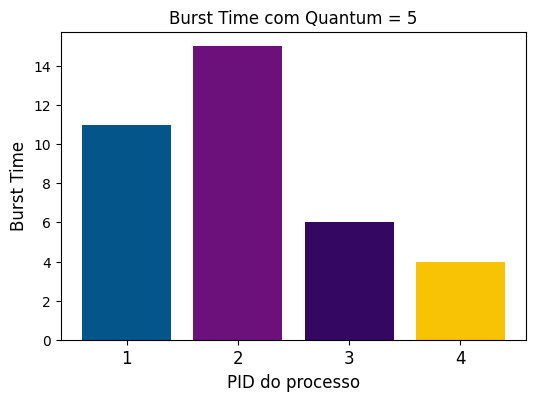

In [338]:
plt.figure(figsize=(6,4))
plt.xticks(fontsize=12)
processos = ['1', '2', '3', '4']
for i in range(4):
    plt.bar(processos[i], burst_time[i], color=cores[i], width=0.8)
plt.xlabel('PID do processo', fontsize=12)
plt.ylabel(f'Burst Time', fontsize=12)
plt.title(f'Burst Time com Quantum = {quantum}',fontsize=12)

plt.show()

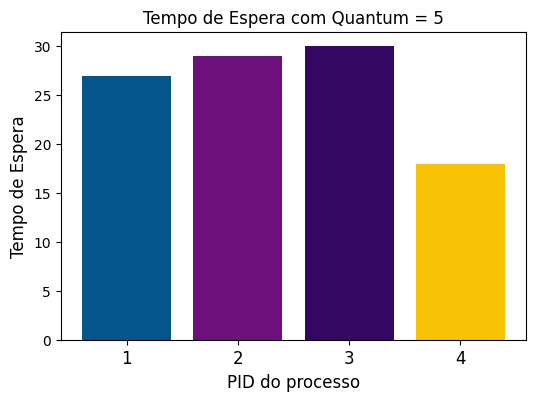

In [339]:
plt.figure(figsize=(6,4))
plt.xticks(fontsize=12)
processos = ['1', '2', '3', '4']
for i in range(4):
    plt.bar(processos[i], waiting_time[i], color=cores[i], width=0.8)
plt.xlabel('PID do processo', fontsize=12)
plt.ylabel(f'Tempo de Espera', fontsize=12)
plt.title(f'Tempo de Espera com Quantum = {quantum}',fontsize=12)

plt.show()

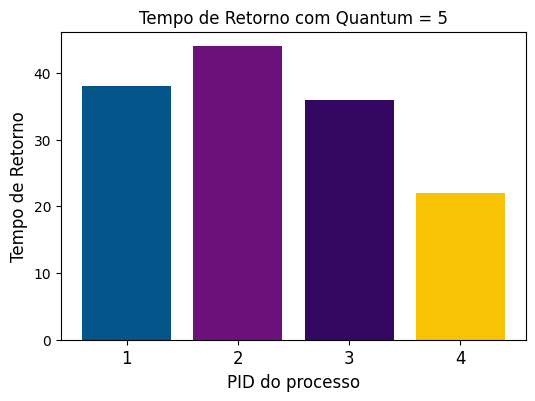

In [340]:
plt.figure(figsize=(6,4))
plt.xticks(fontsize=12)
processos = ['1', '2', '3', '4']
for i in range(4):
    plt.bar(processos[i], return_time[i], color=cores[i], width=0.8)
plt.xlabel('PID do processo', fontsize=12)
plt.ylabel(f'Tempo de Retorno', fontsize=12)
plt.title(f'Tempo de Retorno com Quantum = {quantum}',fontsize=12)

plt.show()

# Resultado de Quantum = 10

In [341]:
process = [Process(1, 11), Process(2, 15), Process(3, 6), Process(4, 4)]
quantum = 10

In [342]:
burst_time, avg_wt, avg_rt, total_wt, total_rt, rate, waiting_time, return_time, time, exec = round_robin(process, quantum)

print("Burst Time", burst_time)
print("Tempo de espera", waiting_time)
print("Tempo de retorno", return_time)
print(f"\nTempo médio de espera = {avg_wt}")
print(f"Tempo médio de retorno = {avg_rt} ")
print(f"Tempo total de execução = {time}")
print("Vazão = %.5f processos por unidade de tempo" % rate)
print("Sequência de execução: ", exec)

Burst Time [11, 15, 6, 4]
Tempo de espera [24, 26, 22, 29]
Tempo de retorno [35, 41, 28, 33]

Tempo médio de espera = 25.25
Tempo médio de retorno = 34.25 
Tempo total de execução = 42
Vazão = 0.09524 processos por unidade de tempo
Sequência de execução:  [1, 2, 3, 4, 1, 2]


In [352]:
avg_wait_time[quantum] = avg_wt
avg_ret_time[quantum] = avg_rt
total_time[quantum] = time
rates[quantum] = rate


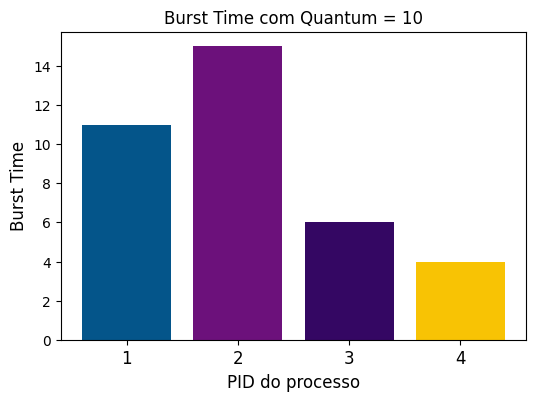

In [344]:
plt.figure(figsize=(6,4))
plt.xticks(fontsize=12)
processos = ['1', '2', '3', '4']
for i in range(4):
    plt.bar(processos[i], burst_time[i], color=cores[i], width=0.8)
plt.xlabel('PID do processo', fontsize=12)
plt.ylabel(f'Burst Time', fontsize=12)
plt.title(f'Burst Time com Quantum = {quantum}',fontsize=12)

plt.show()

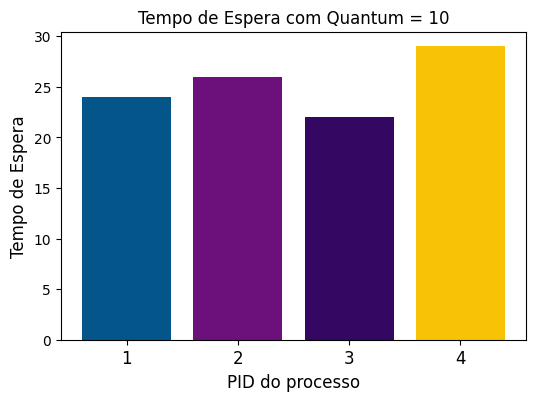

In [345]:
plt.figure(figsize=(6,4))
plt.xticks(fontsize=12)
processos = ['1', '2', '3', '4']
for i in range(4):
    plt.bar(processos[i], waiting_time[i], color=cores[i], width=0.8)
plt.xlabel('PID do processo', fontsize=12)
plt.ylabel(f'Tempo de Espera', fontsize=12)
plt.title(f'Tempo de Espera com Quantum = {quantum}',fontsize=12)

plt.show()

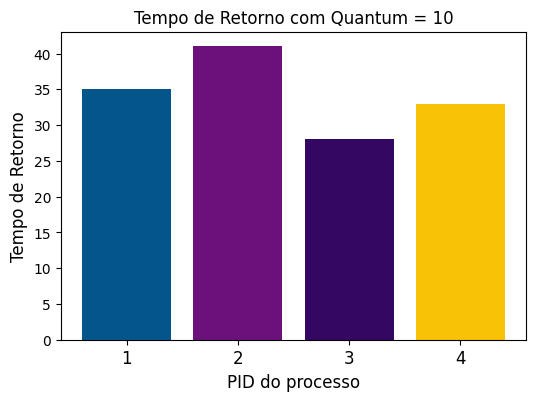

In [346]:
plt.figure(figsize=(6,4))
plt.xticks(fontsize=12)
processos = ['1', '2', '3', '4']
for i in range(4):
    plt.bar(processos[i], return_time[i], color=cores[i], width=0.8)
plt.xlabel('PID do processo', fontsize=12)
plt.ylabel(f'Tempo de Retorno', fontsize=12)
plt.title(f'Tempo de Retorno com Quantum = {quantum}',fontsize=12)

plt.show()

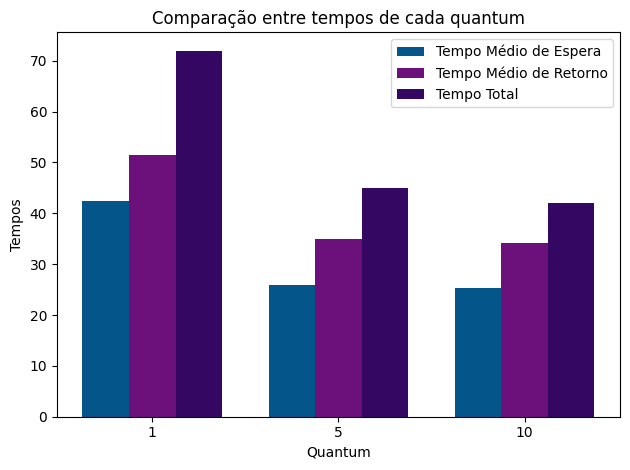

In [347]:
quantum_values = [1, 5, 10]
avg_wait_time = {1: 42.5, 5: 26.0, 10: 25.25}
avg_ret_time = {1: 51.5, 5: 35.0, 10: 34.25}
rates = {1: 0.05555555555555555, 5: 0.08888888888888889, 10: 0.0}

bar_width = 0.25
index = range(len(quantum_values))

plt.bar(index, avg_wait_time.values(), bar_width, color = cores[0], label='Tempo Médio de Espera')
plt.bar([i + bar_width for i in index], avg_ret_time.values(), bar_width, color = cores[1], label='Tempo Médio de Retorno')
plt.bar([i + 2 * bar_width for i in index], total_time.values(), bar_width, color = cores[2], label='Tempo Total')

plt.xlabel('Quantum')
plt.ylabel('Tempos')
plt.title('Comparação entre tempos de cada quantum')
plt.xticks([i + bar_width for i in index], quantum_values)
plt.legend()

plt.tight_layout()
plt.show()


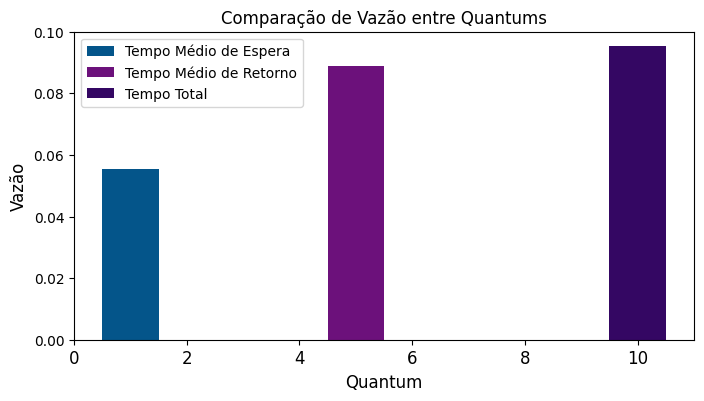

In [369]:
plt.figure(figsize=(8, 4))
plt.xticks(fontsize=12)
quantum_values = [1, 5, 10]
labels = ['Tempo Médio de Espera', 'Tempo Médio de Retorno', 'Tempo Total']
for i in range(3):
    plt.bar(quantum_values[i], rates[quantum_values[i]], color=cores[i], width=1, label=labels[i])
plt.xlabel('Quantum', fontsize=12)
plt.ylabel('Vazão', fontsize=12)
plt.title('Comparação de Vazão entre Quantums', fontsize=12)
plt.legend(fontsize=10, loc='upper left')
plt.show()